In [1]:
import sys
sys.path.append('../src_variable')

import matplotlib.pyplot as plt
import torch
import road as r
import junction as j
import traffic_lights as tf
import plotting as plot
import initial_and_bc as ib
import network as nw
import numpy as np

#### Plotting analytical solution for some different times

In [2]:
rhoL = 1/3
rhoR = 3/4

def rho0(x):
    out = torch.zeros_like(x)
    for i, x_ in enumerate(x):
        if x_ <= 0:
            out[i] = rhoL
        elif x_ <= 1:
            out[i] = rhoL + (rhoR - rhoL) * x_
        else:
            out[i] = rhoR
    return out

ts = (1) / (2*(rhoR - rhoL))
xs = (1 - 2*rhoL) / (2*(rhoR - rhoL))

def s(t):
    return (1 - (rhoL + rhoR)) * (t - ts) + xs

def rho(x,t):
    # print((1-2*rhoL)*t)
    # print((1 - 2*rhoR) * t + 1)
    out = torch.zeros_like(x)

    if t <= ts:
        for i, x_ in enumerate(x):
            if x_ <= (1-2*rhoL)*t:
                out[i] = rhoL
            elif x_ <= (1 - 2*rhoR) * t + 1:
                out[i] = rhoL + (rhoR - rhoL) * (x_ - (1-2*rhoL)*t) / (1 - 2*(rhoR - rhoL)*t)
                # print(rhoL + (rhoR - rhoL) * (x_ - (1-2*rhoL)*t) / (1 - (2*(rhoR - rhoL))*t))
            else:
                out[i] = rhoR
    else:
        for i, x_ in enumerate(x):
            if x_ <= s(t):
                out[i] = rhoL
            else:
                out[i] = rhoR

    return out
print(xs, ts)

0.4 1.2


In [3]:
def initial_rho(x):
    out = (x[:-1] + x[1:]) / 2
    return out

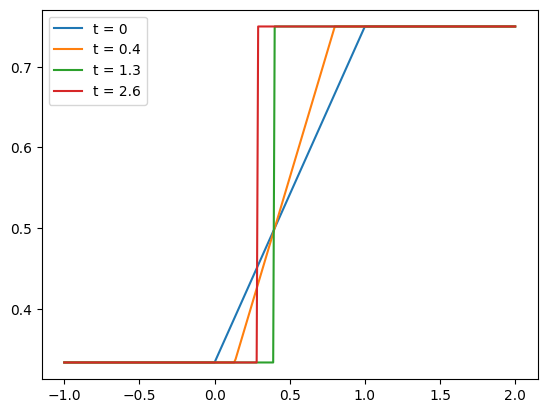

In [4]:
N = 301
x = torch.linspace(-1, 2, N)

t1 = 0
t2 = 0.4
t3 = 1.3
t4 = 2.6

y1 = rho0(x)
y2 = rho(x, t2)
y3 = rho(x, t3)
y4 = rho(x, t4)


plt.plot(x, y1, label = f"t = {t1}")
plt.plot(x, y2, label = f"t = {t2}")
plt.plot(x, y3, label = f"t = {t3}")
plt.plot(x, y4, label = f"t = {t4}")
plt.legend()

plt.show()

#### Numerical results

Instead of going from -1, 2, the numerical results will go from 0 to 3

In [5]:
# def initial_func(x):
#     out = torch.zeros_like(x)
#     for i, x_ in enumerate(x):
#         if x_ <= 1:
#             out[i] = rhoL
#         elif x_ <= 2:
#             out[i] = 2*rhoL - rhoR+ (rhoR - rhoL) * x_
#         else:
#             out[i] = rhoR
#     return out

In [6]:
# # Initialize road
# # t1 = 0.5
# # t2 = 1.0
# # t3 = 2
# t = 0.8
# N1 = 5
# N2 = 10
# N3 = 20
# N4 = 40
# N5 = 80
# N6 = 160
# N7 = 320

# road1 = r.Road(3, 1, N1-1, [3.6], [], inflow=rhoL)
# road1.rho = initial_rho(rho0(torch.linspace(-1, 2, 3*N1 + 1)))
# network1 = nw.RoadNetwork([road1], [], t)
# densities1, _ = network1.solve_cons_law()

# road2 = r.Road(3, 1, N2-1, [3.6], [], inflow=rhoL)
# road2.rho = initial_rho(rho0(torch.linspace(-1, 2, 3*N2 + 1)))
# network2 = nw.RoadNetwork([road2], [], t)
# densities2, _ = network2.solve_cons_law()

# road3 = r.Road(3, 1, N3-1, [3.6], [], inflow=rhoL)
# road3.rho = initial_rho(rho0(torch.linspace(-1, 2, 3*N3 + 1)))
# network3 = nw.RoadNetwork([road3], [], t)
# densities3, _ = network3.solve_cons_law()

# road4 = r.Road(3, 1, N4-1, [3.6], [], inflow=rhoL)
# road4.rho = initial_rho(rho0(torch.linspace(-1, 2, 3*N4 + 1)))
# network4 = nw.RoadNetwork([road4], [], t)
# densities4, _ = network4.solve_cons_law()

# road5 = r.Road(3, 1, N5-1, [3.6], [], inflow=rhoL)
# road5.rho = initial_rho(rho0(torch.linspace(-1, 2, 3*N5 + 1)))
# network5 = nw.RoadNetwork([road5], [], t)
# densities5, _ = network5.solve_cons_law()

In [7]:
# N = np.array([20, 40, 80, 160, 320, 640, 1280, 2560])
# errors = np.array([94.6, 54.4, 17, 7.7, 2.14, 0.613, 0.168, 0.0449])

In [8]:
# for i in range(1,len(N)):
#     print((np.log(errors[i])-np.log(errors[i-1])) / (np.log(N[i-1]) - np.log(N[i])))

In [9]:
# print(densities3[0].keys())

### Comparing numerical values at end for the different step lengths

Should do L1 norm over time and space

In [10]:
# def l1_norm(x, densities):
#     times = list(densities[0].keys())
#     dt = times[1] - times[0]

#     error = 
#     for t in times:


In [11]:
# x1 = torch.linspace(-1, 2, 3*N1 + 1)
# analytical1 = rho(x1, t)

# x2 = torch.linspace(-1, 2, 3*N2 + 1)
# analytical2 = rho(x2, t)

# x3 = torch.linspace(-1, 2, 3*N3 + 1)
# analytical3 = rho(x3, t)

# x4 = torch.linspace(-1, 2, 3*N4 + 1)
# analytical4 = rho(x4, t)

# x5 = torch.linspace(-1, 2, 3*N5 + 1)
# analytical5 = rho(x5, t)

In [12]:
# error1 = (max(torch.abs(road1.rho - initial_rho(analytical1)))).detach() #* road1.dx).detach()
# error2 = (max(torch.abs(road2.rho - initial_rho(analytical2)))).detach() #* road2.dx).detach()
# error3 = (max(torch.abs(road3.rho - initial_rho(analytical3)))).detach() #* road3.dx).detach()
# error4 = (max(torch.abs(road4.rho - initial_rho(analytical4)))).detach() #* road4.dx).detach()
# error5 = (max(torch.abs(road5.rho - initial_rho(analytical5)))).detach() #* road5.dx).detach()

# print(error1, error2, error3, error4, error5)
# print(road1.dx, road2.dx, road3.dx, road4.dx, road5.dx)

In [13]:
# plt.plot([np.log(road1.dx), np.log(road2.dx), np.log(road3.dx), np.log(road4.dx), np.log(road5.dx)], 
#          [np.log(error1), np.log(error2), np.log(error3), np.log(error4), np.log(error5)])
# plt.show()

In [14]:
# print((np.log(error2) - np.log(error1)) / (np.log(road2.dx) - np.log(road1.dx)))
# print((np.log(error3) - np.log(error2)) / (np.log(road3.dx) - np.log(road2.dx)))
# print((np.log(error4) - np.log(error3)) / (np.log(road4.dx) - np.log(road3.dx)))
# print((np.log(error5) - np.log(error4)) / (np.log(road5.dx) - np.log(road4.dx)))
# print((error2 - error1) / (road2.dx - road1.dx))


#### More generalized code

In [18]:
t = 0.4
N_list = [5, 10, 20, 40, 80, 160, 320, 640, 1280]#, 1280, 2560]
densities_list = [None] * len(N_list) # Contains densisties at end
relative_errors = [None] * len(N_list)
for i, n in enumerate(N_list):
    road = r.Road(3, 1, n-1, [3.6], [], inflow=rhoL, scheme=3)
    road.rho = initial_rho(rho0(torch.linspace(-1, 2, 3*n + 1)))
    network = nw.RoadNetwork([road], [], t)
    densities, _ = network.solve_cons_law()
    densities_list[i] = densities[0][t]
    x = torch.linspace(-1, 2, 3*n + 1)

    # Right now only ending time is considered
    # Should probably integrate over time as well
    analytical = rho(x, t)
    averages = initial_rho(analytical)

    # Is this the correct relative error?
    relative_error = (sum(torch.abs(road.rho - initial_rho(analytical)))*road.dx).detach() 
    exact_l1 = (sum(torch.abs(initial_rho(analytical)))*road.dx).detach() 

    relative_errors[i] = 100 * (relative_error / exact_l1)

In [19]:
for i in range(1, len(relative_errors)):
    print( (np.log(relative_errors[i]) - np.log(relative_errors[i-1])) / (np.log(N_list[i-1]) - np.log(N_list[i])))

tensor(0.8050)
tensor(0.5840)
tensor(0.7249)
tensor(0.8323)
tensor(0.8861)
tensor(0.9187)
tensor(0.9403)
tensor(0.9566)


In [17]:
fff

NameError: name 'fff' is not defined

1920


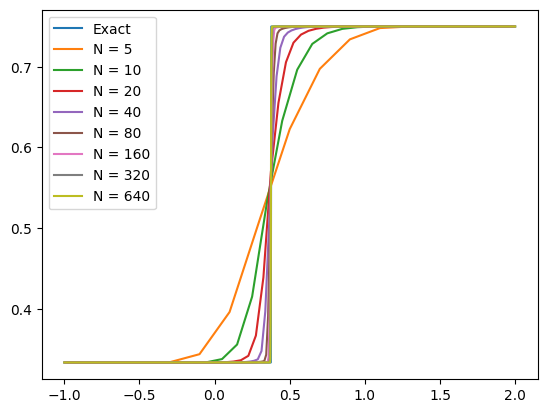

In [ ]:
# Plot the solutions in the same plot
x = torch.linspace(-1, 2, 3*N_list[-1] + 1)
print(len(initial_rho(x)))
plt.plot(initial_rho(x), averages, label = "Exact")

start = 0
for i, n in enumerate(np.array(N_list)[start:]):
    x = initial_rho(torch.linspace(-1, 2, 3*n + 1))
    # print(len(x))
    # print(len(densities_list[i]))
    plt.plot(x, densities_list[i + start].detach(), label=f"N = {n}")

plt.legend()
plt.show()

Solution not smooth so truncation error not well defined - is to be expected that OOC is not equal to 2, even though the scheme is 2. order accurate.

Instead consider case with initial data before discontinuity occurs.

In [ ]:
# def initial_smooth(x):
#     return 0.5 * (1. - torch.sin(2*torch.pi * x))
# def initial_smooth(x):
#     return torch.cos(4*torch.pi*x)

def initial_smooth(x):
    # Change to sin if convergence order gets fucked
    return  0.25*(torch.sin(2*torch.pi * x))

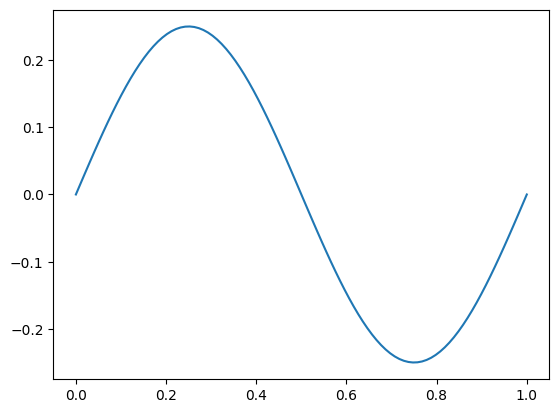

In [ ]:
x = torch.linspace(0,1,100)
y = initial_smooth(x)
plt.plot(x, y)
plt.show()

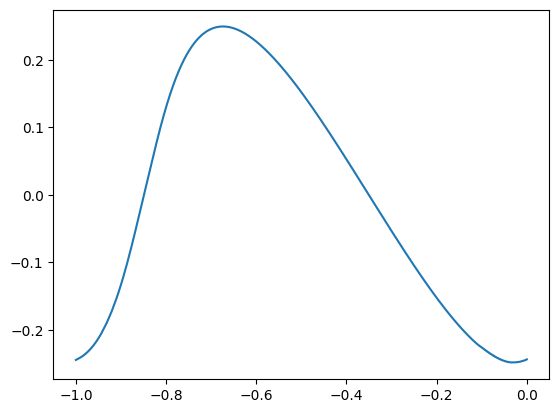

In [ ]:
# Calculate exact solution at time t = 0.15
# Final try: Fix time t, or maybe don't fix time?
t = 0.15
N = 1280

road = r.Road(1, 1, N, [3.6], [], inflow=rhoL, periodic=True, limiter="superbee")
# print(len(road.rho))
rho = torch.zeros(N + 2*road.pad)
# print(len(rho))
interior = initial_smooth(torch.linspace(0, 1, N))

road.rho = torch.cat((interior[-2:], interior, interior[:2]))

network = nw.RoadNetwork([road], [], t)
# plt.show()
exact_densities, _ = network.solve_cons_law()

fig = plot.plot_first_road(exact_densities, network)
plt.show()


In [ ]:
# print(exact_densities[0].keys())
# print(1/640)

In [ ]:
# Caclulate approximate densities
N_list = [10, 50, 100, 200, 400, 600]#, 250, 300, 350, 400, 450, 500,550, 600]#, 250, 300, 350]#, 320, 640, 1280]#, 640]#, 1280
t = 0.15
density_list =  [None] * len(N_list)
for i, n in enumerate(N_list):
    road = r.Road(1, 1, n, [3.6], [], inflow=rhoL, periodic=True, limiter="superbee")
    rho = torch.zeros(n + 2*road.pad)
    # print(len(rho))
    interior = initial_smooth(torch.linspace(0, 1, n))

    road.rho = torch.cat((interior[-2:], interior, interior[:2]))

    network = nw.RoadNetwork([road], [], t)
    # plt.show()
    densities, _ = network.solve_cons_law()
    density_list[i] = densities

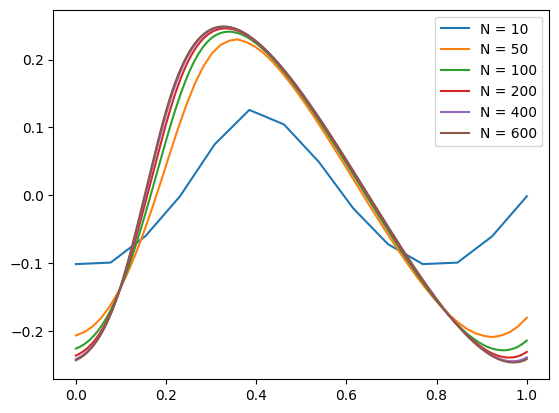

In [ ]:
for i in range(len(N_list)):
    x = torch.linspace(0,1,N_list[i]+4)
    plt.plot(x, density_list[i][0][t].detach(), label=f"N = {N_list[i]}")

plt.legend()
plt.show()

In [ ]:
# print(torch.linspace(0, 1, n))

In [ ]:
x = np.linspace(0,1,N_list[-1])
y = np.array(density_list[-1][0][t].detach())[2:-2]
xnew = np.linspace(0,1,len(exact_densities[0][t]) - 4)
y_new = np.interp(xnew, x, y)

In [ ]:
def estimate_L1(exact, approximation):
    # Boundary nodes should be ignored since they are already considered in interior nodes
    
    exact_interior = exact[2:-2]
    approx_interior = approximation[2:-2]

    dx = 1 / len(approx_interior)
    dx_exact = 1 / len(exact_interior)

    n = int(len(exact_interior) / len(approx_interior))

    error = 0
    exact_error = 0
    for i in range(len(approx_interior)):
        for j in range(n):
            error += abs(approx_interior[i] - exact_interior[i*n + j]) * dx_exact
            exact_error += abs(exact_interior[i*n + j]) * dx_exact
        #error += abs(approx_interior[i] * dx - sum(exact_interior[i*n:(i+1)*n])* dx_exact)
    error = 100 * (error/exact_error)
    return error

def estimate_L1_inter(exact, approximation):
    """
    Performs linear interpolation
    """
    exact_int = exact[2:-2]
    approx_int = approximation[2:-2]

    x = np.linspace(0,1,len(approx_int))
    y = np.array(approx_int)
    xnew = np.linspace(0,1,len(exact_int))
    y_new = np.interp(xnew, x, y)

    dx_exact = 1 / len(exact_int)


    error = 0
    exact_error = 0
    for i in range(len(exact_int)):
        error += abs(exact_int[i] - y_new[i]) * dx_exact
        exact_error += abs(exact_int[i]) * dx_exact

    error = 100 * (error / exact_error)
    return error
    


In [ ]:
errors = []
for i in range(len(N_list)):
    # if i == 1:
    #     continue
    errors.append(estimate_L1_inter(exact_densities[0][t].detach(), density_list[i][0][t].detach()))

In [ ]:
print(errors)

[tensor(57.8672), tensor(13.9283), tensor(6.9224), tensor(3.2415), tensor(1.3520), tensor(0.7322)]


In [ ]:
for i in range(1, len(errors)):
    print((np.log(errors[i]) - np.log(errors[i-1])) / (np.log(N_list[i-1]) - np.log(N_list[i])))

tensor(0.8849)
tensor(1.0087)
tensor(1.0946)
tensor(1.2616)
tensor(1.5126)


In [ ]:
rrr

NameError: name 'rrr' is not defined

#### Estimate L1 error and convergence

In [ ]:
for d in density_list:
    print(d[0][t])

tensor([0.5001, 0.7357, 0.5034, 0.2647, 0.5001, 0.7357, 0.5034, 0.2647],
       grad_fn=<CopySlices>)
tensor([0.7967, 0.6887, 0.5029, 0.3121, 0.2035, 0.1706, 0.3537, 0.6464, 0.8295,
        0.7967, 0.6887, 0.5029, 0.3121], grad_fn=<CopySlices>)
tensor([0.6920, 0.6137, 0.5016, 0.3868, 0.3082, 0.2408, 0.1829, 0.1361, 0.1045,
        0.1007, 0.1818, 0.3456, 0.6544, 0.8182, 0.8993, 0.8955, 0.8639, 0.8172,
        0.7593, 0.6920, 0.6137, 0.5016, 0.3868], grad_fn=<CopySlices>)
tensor([0.6036, 0.5602, 0.5008, 0.4400, 0.3965, 0.3565, 0.3183, 0.2816, 0.2464,
        0.2129, 0.1812, 0.1518, 0.1251, 0.1014, 0.0815, 0.0661, 0.0567, 0.0562,
        0.0744, 0.1140, 0.1985, 0.3574, 0.6426, 0.8015, 0.8860, 0.9256, 0.9438,
        0.9433, 0.9339, 0.9185, 0.8986, 0.8749, 0.8482, 0.8188, 0.7871, 0.7536,
        0.7184, 0.6817, 0.6435, 0.6036, 0.5602, 0.5008, 0.4400],
       grad_fn=<CopySlices>)
tensor([0.5527, 0.5305, 0.5004, 0.4696, 0.4474, 0.4266, 0.4064, 0.3864, 0.3667,
        0.3472, 0.3279, 0.3088

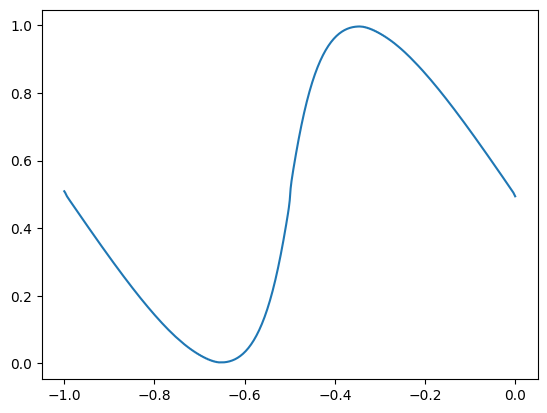

In [ ]:
# Solving numerically with periodic boundary conditions
t = 0.1
N = 500

road = r.Road(1, 1, N-1, [3.6], [], inflow=rhoL, periodic=True)
# print(len(road.rho))
rho = torch.zeros(N-1 + 2*road.pad)
# print(len(rho))
interior = initial_smooth(torch.linspace(0, 1, N))[:-1]

road.rho = torch.cat((interior[-2:], interior, interior[:2]))

network = nw.RoadNetwork([road], [], t)
# plt.show()
densities, _ = network.solve_cons_law()

fig = plot.plot_first_road(densities, network)
plt.show()

In [ ]:
print(densities)

{0: {0: tensor([5.1570e-01, 5.4703e-01, 5.7818e-01, 6.0902e-01, 6.3943e-01, 6.6929e-01,
        6.9848e-01, 7.2688e-01, 7.5440e-01, 7.8090e-01, 8.0630e-01, 8.3049e-01,
        8.5338e-01, 8.7487e-01, 8.9488e-01, 9.1334e-01, 9.3016e-01, 9.4528e-01,
        9.5865e-01, 9.7021e-01, 9.7991e-01, 9.8772e-01, 9.9360e-01, 9.9754e-01,
        9.9951e-01, 9.9951e-01, 9.9754e-01, 9.9360e-01, 9.8772e-01, 9.7991e-01,
        9.7021e-01, 9.5865e-01, 9.4528e-01, 9.3016e-01, 9.1334e-01, 8.9488e-01,
        8.7487e-01, 8.5338e-01, 8.3049e-01, 8.0630e-01, 7.8090e-01, 7.5440e-01,
        7.2688e-01, 6.9848e-01, 6.6929e-01, 6.3943e-01, 6.0902e-01, 5.7818e-01,
        5.4703e-01, 5.1570e-01, 4.8430e-01, 4.5297e-01, 4.2182e-01, 3.9098e-01,
        3.6057e-01, 3.3071e-01, 3.0152e-01, 2.7312e-01, 2.4560e-01, 2.1910e-01,
        1.9370e-01, 1.6951e-01, 1.4662e-01, 1.2513e-01, 1.0512e-01, 8.6664e-02,
        6.9841e-02, 5.4716e-02, 4.1349e-02, 2.9792e-02, 2.0090e-02, 1.2282e-02,
        6.3995e-03, 2.4646e-03, 

In [ ]:
print(initial_rho(rho(x, 0.5))- road1.rho)

tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0

In [ ]:
a = torch.tensor([-0.0098,  0.0098,  0.0294,  0.0490,  0.0686,  0.0882,  0.1078,  0.1275,
         0.1471,  0.1667,  0.1863,  0.2059,  0.2255,  0.2451,  0.2647,  0.2843,
         0.3039,  0.3235,  0.3431,  0.3627,  0.3824,  0.4020,  0.4216,  0.4412,
         0.4608,  0.4804,  0.5000,  0.5196,  0.5392,  0.5588,  0.5784,  0.5980,
         0.6176,  0.6373,  0.6569,  0.6765,  0.6961,  0.7157,  0.7353,  0.7549,
         0.7745,  0.7941,  0.8137,  0.8333,  0.8529,  0.8725,  0.8922,  0.9118,
         0.9314,  0.9510,  0.9706,  0.9902,  1.0098,  1.0294,  1.0490,  1.0686,
         1.0882,  1.1078,  1.1275,  1.1471,  1.1667,  1.1863,  1.2059,  1.2255,
         1.2451,  1.2647,  1.2843,  1.3039,  1.3235,  1.3431,  1.3627,  1.3824,
         1.4020,  1.4216,  1.4412,  1.4608,  1.4804,  1.5000,  1.5196,  1.5392,
         1.5588,  1.5784,  1.5980,  1.6176,  1.6373,  1.6569,  1.6765,  1.6961,
         1.7157,  1.7353,  1.7549,  1.7745,  1.7941,  1.8137,  1.8333,  1.8529,
         1.8725,  1.8922,  1.9118,  1.9314,  1.9510,  1.9706,  1.9902,  2.0098,
         2.0294,  2.0490,  2.0686,  2.0882,  2.1078,  2.1275,  2.1471,  2.1667,
         2.1863,  2.2059,  2.2255,  2.2451,  2.2647,  2.2843,  2.3039,  2.3235,
         2.3431,  2.3627,  2.3824,  2.4020,  2.4216,  2.4412,  2.4608,  2.4804,
         2.5000,  2.5196,  2.5392,  2.5588,  2.5784,  2.5980,  2.6176,  2.6373,
         2.6569,  2.6765,  2.6961,  2.7157,  2.7353,  2.7549,  2.7745,  2.7941,
         2.8137,  2.8333,  2.8529,  2.8725,  2.8922,  2.9118,  2.9314,  2.9510,
         2.9706,  2.9902,  3.0098,  3.0294])
b = torch.tensor([0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333,
        0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333,
        0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333,
        0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333,
        0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333,
        0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3333, 0.3374, 0.3456,
        0.3538, 0.3619, 0.3701, 0.3783, 0.3864, 0.3946, 0.4028, 0.4109, 0.4191,
        0.4273, 0.4355, 0.4436, 0.4518, 0.4600, 0.4681, 0.4763, 0.4845, 0.4926,
        0.5008, 0.5090, 0.5172, 0.5253, 0.5335, 0.5417, 0.5498, 0.5580, 0.5662,
        0.5743, 0.5825, 0.5907, 0.5989, 0.6070, 0.6152, 0.6234, 0.6315, 0.6397,
        0.6479, 0.6560, 0.6642, 0.6724, 0.6806, 0.6887, 0.6969, 0.7051, 0.7132,
        0.7214, 0.7296, 0.7377, 0.7459, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500,
        0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500,
        0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500,
        0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500,
        0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500,
        0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500, 0.7500,
        0.7500, 0.7500, 0.7500])

In [ ]:
print(len(a))
for i in range(len(a)):
    if b[i] != 0.3333:
        print(a[i], i)
        break

156
tensor(1.0098) 52


In [ ]:
x = torch.linspace(-1,2, 156)
y = rho0(x)

In [ ]:
print(y - b)

tensor([ 3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,  3.3349e-05,
         3.3349e-05,  3.3349e-05, -1.3785e-03, -1.5140e-03, -1.6495e-03,
        -1.6849e-03, -1.8204e-03, -1.9559e-03, -1.9914e-03, -2.1269e-03,
        -2.2624e-03, -2.2978e-03, -2.4333e-03, -2.5688e-03, -2.7043e-03,
        -2.7398e-03, -2.8753e-03, -3.0108e-03, -3.0

In [ ]:
for i in range(len(x)):
    if abs(y[i] - 0.3333) > 0.001:
        print(x[i], i, y[i])
        break

tensor(0.0130) 52 tensor(0.3387)


In [ ]:
# print(road1.b)
# print(road1.dx)
# print(road1.L)
# print(road1.scheme)
# print(road1.max_dens)
# print(road1.Vmax)
# print(road1.Vmax)


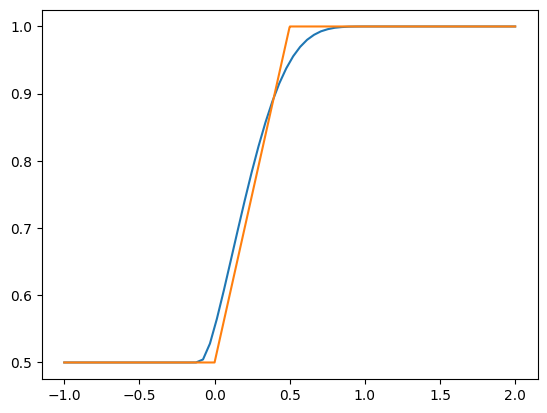

In [ ]:
fig = plot.plot_first_road(densities1, network1)
t = 0.5
y = rho(x, t)
plt.plot(x, y)
plt.show()

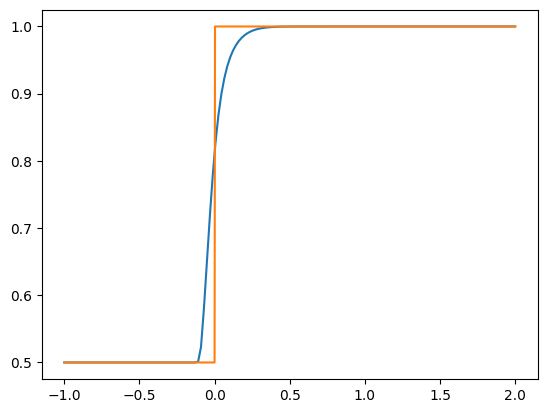

In [ ]:
fig = plot.plot_first_road(densities2, network2)
t = 1
y = rho(x, t)
plt.plot(x, y)
plt.show()

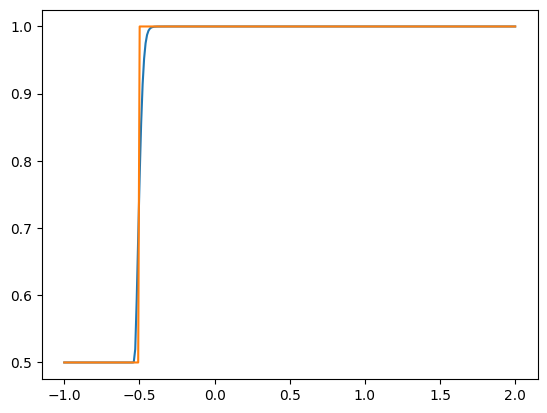

In [ ]:
fig = plot.plot_first_road(densities3, network3)
t = 2
y = rho(x, t)
plt.plot(x, y)
plt.show()

In [ ]:
print(torch.sum(torch.abs(densities3[0][2] - y)) / 306)

tensor(0.0028, grad_fn=<DivBackward0>)


In [ ]:
print(network3.roads[0].dx)
print(list(densities3[0].keys()))

0.009900990099009901
[0, 0.009900989942252636, 0.019801979884505272, 0.029702969826757908, 0.039603959769010544, 0.04950494971126318, 0.059405939653515816, 0.06930692959576845, 0.07920791953802109, 0.08910890948027372, 0.09900989942252636, 0.108910889364779, 0.11881187930703163, 0.12871286924928427, 0.1386138591915369, 0.14851484913378954, 0.15841583907604218, 0.1683168290182948, 0.17821781896054745, 0.18811880890280008, 0.19801979884505272, 0.20792078878730536, 0.217821778729558, 0.22772276867181063, 0.23762375861406326, 0.2475247485563159, 0.25742573849856853, 0.26732672844082117, 0.2772277183830738, 0.28712870832532644, 0.2970296982675791, 0.3069306882098317, 0.31683167815208435, 0.326732668094337, 0.3366336580365896, 0.34653464797884226, 0.3564356379210949, 0.36633662786334753, 0.37623761780560017, 0.3861386077478528, 0.39603959769010544, 0.4059405876323581, 0.4158415775746107, 0.42574256751686335, 0.435643557459116, 0.4455445474013686, 0.45544553734362125, 0.4653465272858739, 0.47

### Old

In [ ]:
def init_func(x):
    out = torch.zeros_like(x)

    for i in range(len(out)):
        if x[i] >= 0.5:
            out[i] = 0.5
    return out

In [ ]:
road = r.Road(1, 1, 100, [3.6], [], initial=init_func, inflow=0.0)
network = nw.RoadNetwork([road], [], 1)

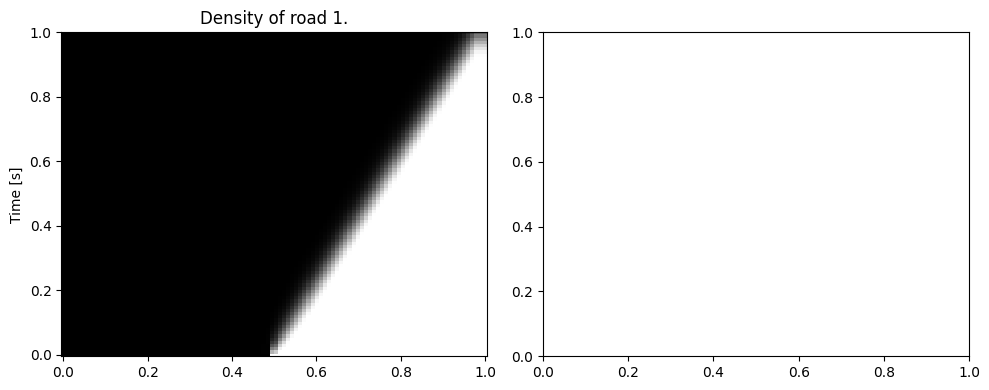

In [ ]:
densities, queus = network.solve_cons_law()
fig, axes = plot.plot_results(densities, queus, network)
plt.show()

### Light traffic heading into heavy traffic

In [ ]:
alpha = 1/6

def light_initial(x):
    out = torch.zeros_like(x)
    for i, x_ in enumerate(x):
        if x_ <= 0:
            out[i] = alpha
        elif x_ <= 1:
            out[i] = alpha + (3/4 - alpha) * x_
        else:
            out[i] = 3/4
    return out

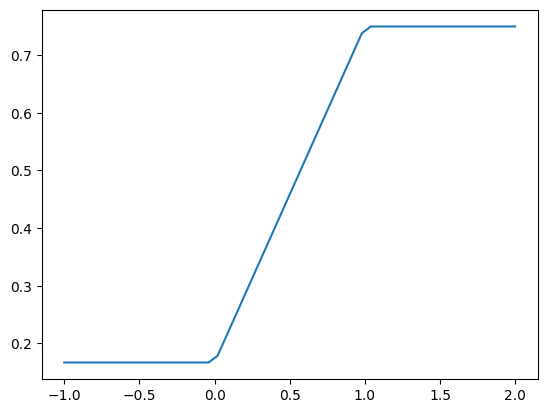

In [ ]:
N = 50
x = torch.linspace(-1, 2, N+1)
y = light_initial(x)


plt.plot(x, y)

In [ ]:
def characteristic(x, t):
    out = torch.zeros_like(x)
    for i, x_ in enumerate(x):
        if x_ <= 0:
            out[i] = (1-2*alpha) * t + x_
        elif x_ <= 1:
            out[i] = (1-2*alpha - 2 * (3/4 - alpha)*x_)*t + x_
        else:
            out[i] = -t/2 + x_
    return out


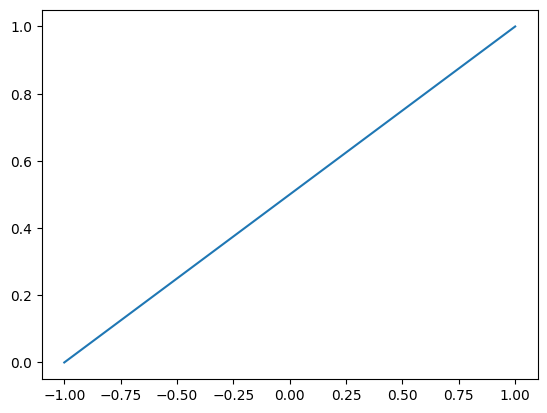

In [ ]:
t = 0
x1 = torch.linspace(-1, 1, 51)
y1 = characteristic(x, t)

plt.plot(x1, y1)